In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns




In [17]:
def SVM_test(path, cv=2, test_size=0.3):
    # Import dataset
    df_dataset = pd.read_csv(path)

    # Set a random state for sampling
    RANDOM_STATE_SEED = np.random.randint(123)
    print(f'Random Seed:{RANDOM_STATE_SEED}')
    
    # Split dataset in train and test
    train, test = train_test_split(df_dataset, test_size=test_size, random_state=RANDOM_STATE_SEED)
    
    # Count how many instances there are in each label
    print(df_dataset["Label"].value_counts())

    # Separate in X and y for better classification
    y_train = np.array(train.pop("Label"))# pop removes "Label" from the dataframe
    X_train = train.values

    print(f'Tipo X_train: {type(X_train)} Tipo y_train: {type(y_train)} Shape X_train:{X_train.shape} Shape y_train: {y_train.shape}')

    y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
    X_test = test.values

    print(f'Tipo X_test: {type(X_test)} Tipo y_test: {type(y_test)} Shape X_test:{X_test.shape} Shape y_test: {y_test.shape}')
    
    # Define the used classification model
    model = SVC(kernel='rbf', gamma='auto')

    # Define the grid for hyperparameter tuning
    param_grid = {
        'C': [0.1, 1, 10],
        #'kernel': ['linear', 'rfb'],
        #'gamma':[0.1, 1, 'scale']
    }

    # Define the final classification model
    clf = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        verbose=1,
        n_jobs=-1 
        )

    # Fit the model to the training data
    
    %time clf.fit(X=X_train, y=y_train)

    # Print best paramenters
    print("Accuracy score on Validation set: \n")
    print(clf.best_score_ )
    print("---------------")
    print("Best performing hyperparameters on Validation set: ")
    print(clf.best_params_)
    print("---------------")
    print(clf.best_estimator_)

    # Test model on test data and print metrics
    model = clf.best_estimator_
    predictions = model.predict(X_test)
    print(classification_report(y_test,predictions,digits=10))
    print(f'Accuracy: {accuracy_score(y_test, predictions)}')

    # Print Confusion Matrix
    cf_matrix = confusion_matrix(y_test, predictions)
    
    sns.heatmap(cf_matrix, annot=True)   

Random Seed:12
Label
normal      67297
abnormal    58026
Name: count, dtype: int64
Tipo X_train: <class 'numpy.ndarray'> Tipo y_train: <class 'numpy.ndarray'> Shape X_train:(87726, 38) Shape y_train: (87726,)
Tipo X_test: <class 'numpy.ndarray'> Tipo y_test: <class 'numpy.ndarray'> Shape X_test:(37597, 38) Shape y_test: (37597,)
Fitting 2 folds for each of 3 candidates, totalling 6 fits
CPU times: user 44.2 s, sys: 204 ms, total: 44.4 s
Wall time: 1min 25s
Accuracy score on Validation set: 

0.9845313818024304
---------------
Best performing hyperparameters on Validation set: 
{'C': 10}
---------------
SVC(C=10, gamma='auto')
              precision    recall  f1-score   support

    abnormal  0.9890466531 0.9812557498 0.9851357982     17392
      normal  0.9839740439 0.9906458797 0.9872986904     20205

    accuracy                      0.9863020986     37597
   macro avg  0.9865103485 0.9859508148 0.9862172443     37597
weighted avg  0.9863205827 0.9863020986 0.9862981579     37597



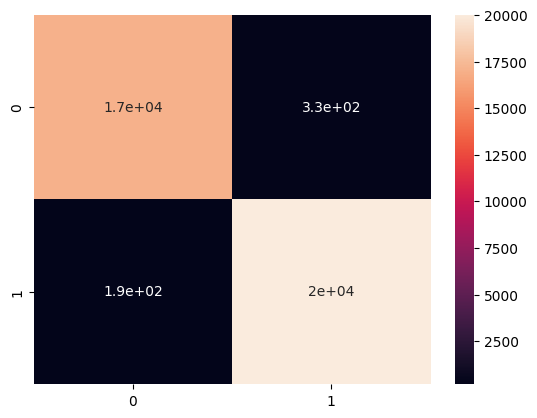

In [18]:
SVM_test('/home/mintssj/Downloads/datasets/filtered/NSL_KDD_equal.csv')